In [41]:
import TurbPy as tb
from TurbPy.imports import *

In [42]:
# deck = 'KH_Lv1di/'
# deck  = 'KH/'
# deck = 'KH_subash/'
deck = 'KH_new/'
# deck = 'KH_beta0.1/'
# deck = 'turb2/'
# deck = 'turb_vth0.01/'

dirs = '/pscratch/sd/g/goodwill/' + deck
figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info = tb.get_vpic_info(dirs)
times = tb.get_times(dirs)
en_out = tb.read_energies(dirs)

twci_out = np.linspace(0, times[-1] * info['dt*wci'], len(en_out['EM']))
twce = np.linspace(0, times[-1] * info['dt*wce'], len(times))
twci = np.linspace(0, times[-1] * info['dt*wci'], len(times))

lx = info['Lx/di']
ly = info['Ly/di']
nx = int(info['nx'])
ny = int(info['ny'])

dt = info['dt*wpe'] * info['fields_interval']

In [43]:
# ps_av  = np.zeros(len(times))
# pid_av = np.zeros(len(times))
# pth_av = np.zeros(len(times))
# for t in np.arange(len(times)):
#   pth, pid = tb.ps_calc(dirs, times[t], sp , norm = False)
#   ps = pth + pid
#   pid_av[t] = np.average(pid)
#   pth_av[t] = np.average(pth)
#   # psi = psi/psi_rms
#   ps_av[t] = pid_av[t] + pth_av[t]

In [44]:
print(twci)

[ 0.          0.99989323  1.99978646  2.9996797   3.99957293  4.99946616
  5.99935939  6.99925262  7.99914586  8.99903909  9.99893232 10.99882555
 11.99871878 12.99861202 13.99850525 14.99839848 15.99829171 16.99818494
 17.99807818 18.99797141 19.99786464 20.99775787 21.9976511  22.99754434
 23.99743757 24.9973308  25.99722403 26.99711726 27.9970105  28.99690373
 29.99679696 30.99669019 31.99658342 32.99647666 33.99636989 34.99626312
 35.99615635 36.99604958 37.99594282 38.99583605 39.99572928 40.99562251
 41.99551574 42.99540898 43.99530221 44.99519544 45.99508867 46.9949819
 47.99487514 48.99476837 49.9946616  50.99455483 51.99444806 52.9943413
 53.99423453 54.99412776 55.99402099 56.99391422 57.99380746 58.99370069
 59.99359392 60.99348715 61.99338038 62.99327362 63.99316685 64.99306008
 65.99295331 66.99284654 67.99273978 68.99263301 69.99252624 70.99241947
 71.9923127  72.99220594 73.99209917 74.9919924  75.99188563 76.99177886
 77.9916721  78.99156533 79.99145856 80.99135179 81.9

In [45]:
en_out = tb.read_energies(dirs)

In [46]:
## Calculate ###
# sp = 'electron'
# ps_av = tb.ps_av(dirs, sp)
# sp = 'ion'
# ps_av = tb.ps_av(dirs, sp)
# en = tb.en_calc(dirs)

In [47]:
# ### Read ###
sp = 'electron'
dse = pd.read_csv(dirs + f'ps{sp[0]}_av.csv', delimiter = ',')
pse_av = dse[f'PS{sp[0]}']

sp = 'ion'
dsi = pd.read_csv(dirs + f'ps{sp[0]}_av.csv', delimiter = ',')
psi_av = dsi[f'PS{sp[0]}']
en = tb.read_calc_energies(dirs)

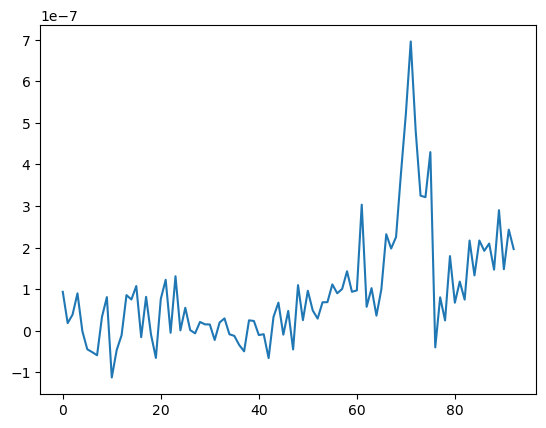

In [48]:
plt.plot(pse_av)

In [49]:
# ps_int = sci.integrate.cumulative_trapezoid(ps_av, initial = 0)
pse_int = np.cumsum(pse_av) * dt
psi_int = np.cumsum(psi_av) * dt

In [50]:
n = 0
time_twci = np.round(twci[n],1)
print(time_twci)
dpse = pse_int
dpsi = psi_int
sp = 'e'
dEthe = (en[f'Eth{sp[0]}'] - en[f'Eth{sp[0]}'][n])/((info['Lx/de'] * info['Ly/de'] * info['Lz/de']))
# dEthi = en['Ethi'] - en['Ethi'][0]

0.0


In [51]:
n = 0
time_twci = np.round(twci[n],1)
print(time_twci)
dpse = pse_int - pse_int[n]
dpsi = psi_int - psi_int[n]
sp = 'i'
dEthi = (en[f'Eth{sp[0]}'] - en[f'Eth{sp[0]}'][n])/((info['Lx/de'] * info['Ly/de'] * info['Lz/de']))
# dEthi = en['Ethi'] - en['Ethi'][0]

0.0


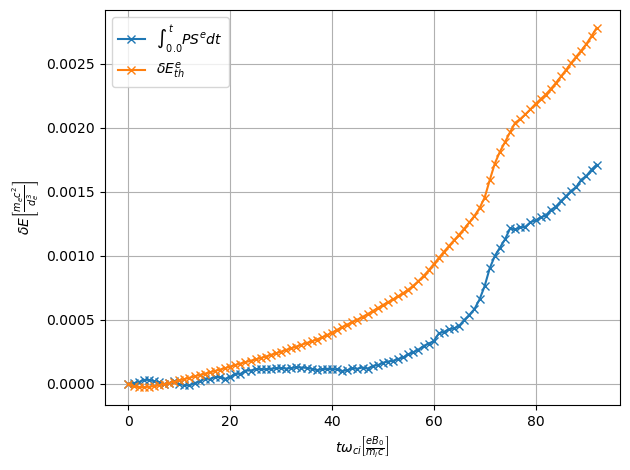

In [52]:
sp = 'e'
plt.plot(twci, dpse ,marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]}'' dt$')
plt.plot(twci, dEthe,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]}''$')
plt.ylabel(r'$\delta E \left[ \frac{m_e c^2}{d_e^3}\right]$')
plt.xlabel(r'$t \omega_{ci}  \left[ \frac{e B_0}{m_i c} \right]$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(figs + f'ps{sp[0]}_dEth{sp[0]}.jpg', dpi = 400)

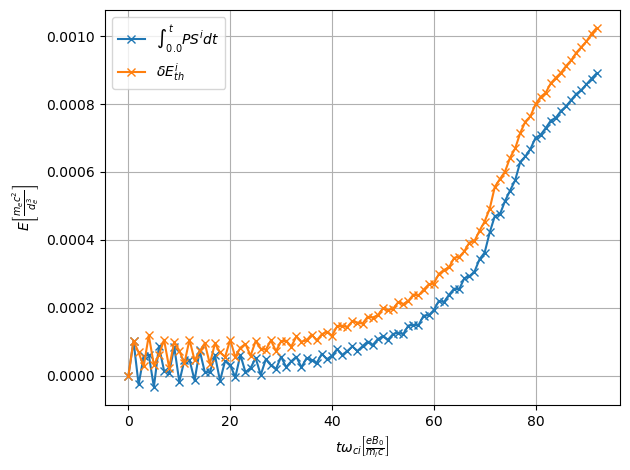

In [53]:
sp = 'i'
plt.plot(twci, dpsi, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]}'' dt$')
plt.plot(twci, dEthi,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]}''$')
plt.ylabel(r'$E \left[ \frac{m_e c^2}{d_e^3}\right]$')
plt.xlabel(r'$t \omega_{ci}  \left[ \frac{e B_0}{m_i c} \right]$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig(figs + f'ps{sp[0]}_dEth{sp[0]}.jpg', dpi = 400)

In [54]:
ds = pd.read_csv(dirs + 'JE_av.csv')

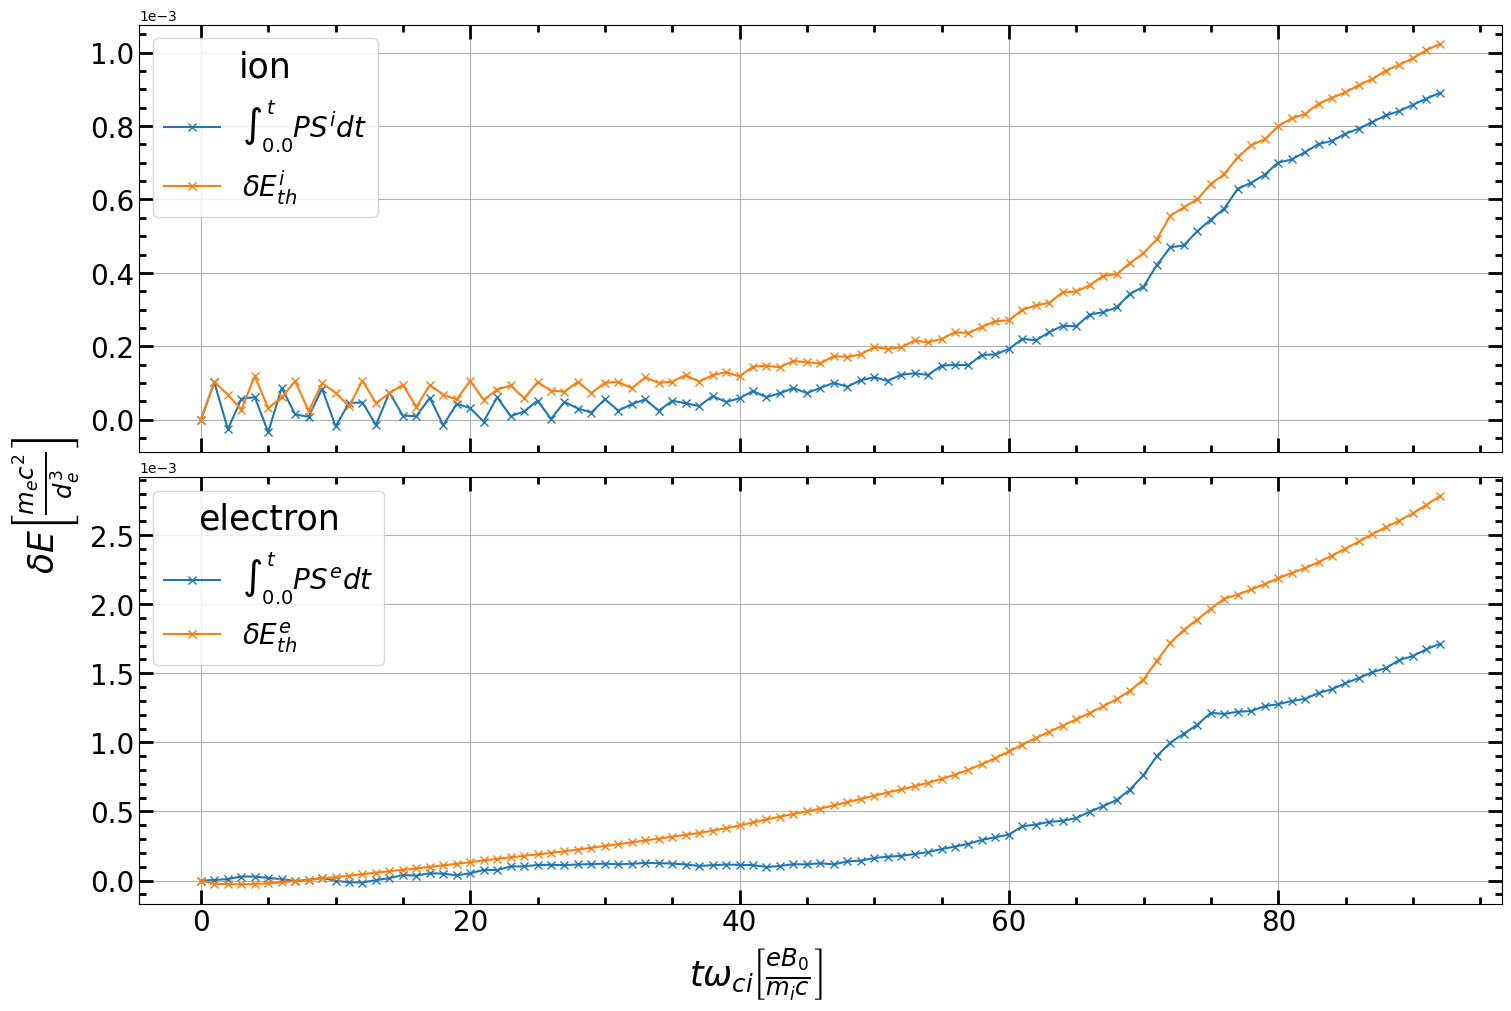

In [55]:
fig, axs = plt.subplots(2,1, figsize=(15, 10), sharex = True, layout='constrained')
sp = 'ion'
axs[0].plot(twci, dpsi, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]}'' dt$')
axs[0].plot(twci, dEthi,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]}''$')
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].legend(title = sp, title_fontsize = 25, loc = 'upper left', fontsize = 20)
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params(which='both', width=2, labelsize = 20, right = True, direction = 'in')
axs[0].tick_params(which='major', length=10, top = True, right =True)
axs[0].tick_params(which='minor', length=5 , top = True, right =True)
axs[0].grid()

sp = 'electron'
axs[1].plot(twci, dpse, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]}'' dt$')
axs[1].plot(twci, dEthe,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]}''$')
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].legend(title = sp, title_fontsize = 25, loc = 'upper left', fontsize = 20)
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params(which='both', width=2, labelsize = 20, right = True, direction = 'in')
axs[1].tick_params(which='major', length=10, top = True, right =True)
axs[1].tick_params(which='minor', length=5 , top = True, right =True)
axs[1].grid()

fig.supylabel(r'$\delta E \left[ \frac{m_e c^2}{d_e^3} \right] $', size = 25)
fig.supxlabel(r'$ t \omega_{ci} \left[ \frac{e B_0}{m_i c} \right]$', size = 25)

plt.savefig(figs + 'PS_dEth.jpg', dpi = 400)

In [64]:
deck = 'KH_400ppc/'
dirs = '/pscratch/sd/g/goodwill/' + deck
figs = '/pscratch/sd/g/goodwill/Fig/' + deck

info4 = tb.get_vpic_info(dirs)
times4 = tb.get_times(dirs)
en_out = tb.read_energies(dirs)

twci_out4 = np.linspace(0, times4[-1] * info['dt*wci'], len(en_out['EM']))
twce4 = np.linspace(0, times4[-1] * info4['dt*wce'], len(times4))
twci4 = np.linspace(0, times4[-1] * info4['dt*wci'], len(times4))

lx = info['Lx/di']
ly = info['Ly/di']
nx = int(info['nx'])
ny = int(info['ny'])

dt = info4['dt*wpe'] * info4['fields_interval']

In [70]:
sp = 'electron'
dse4 = pd.read_csv(dirs + f'ps{sp[0]}_av.csv', delimiter = ',')
pse_av4 = dse4[f'PS{sp[0]}']

sp = 'ion'
dsi4 = pd.read_csv(dirs + f'ps{sp[0]}_av.csv', delimiter = ',')
psi_av4 = dsi4[f'PS{sp[0]}']
en4 = tb.read_calc_energies(dirs)

In [81]:
n = 0
pse_int4 = np.cumsum(pse_av4) * dt
psi_int4 = np.cumsum(psi_av4) * dt
sp = 'electron'
dEthe4 = (en4[f'Eth{sp[0]}'] - en4[f'Eth{sp[0]}'][n])/((info['Lx/de'] * info['Ly/de'] * info['Lz/de']))
sp = 'ion'
dEthi4 = (en4[f'Eth{sp[0]}'] - en4[f'Eth{sp[0]}'][n])/((info['Lx/de'] * info['Ly/de'] * info['Lz/de']))
dpse4 = pse_int4 - pse_int4[n]
dpsi4 = psi_int4 - psi_int4[n]

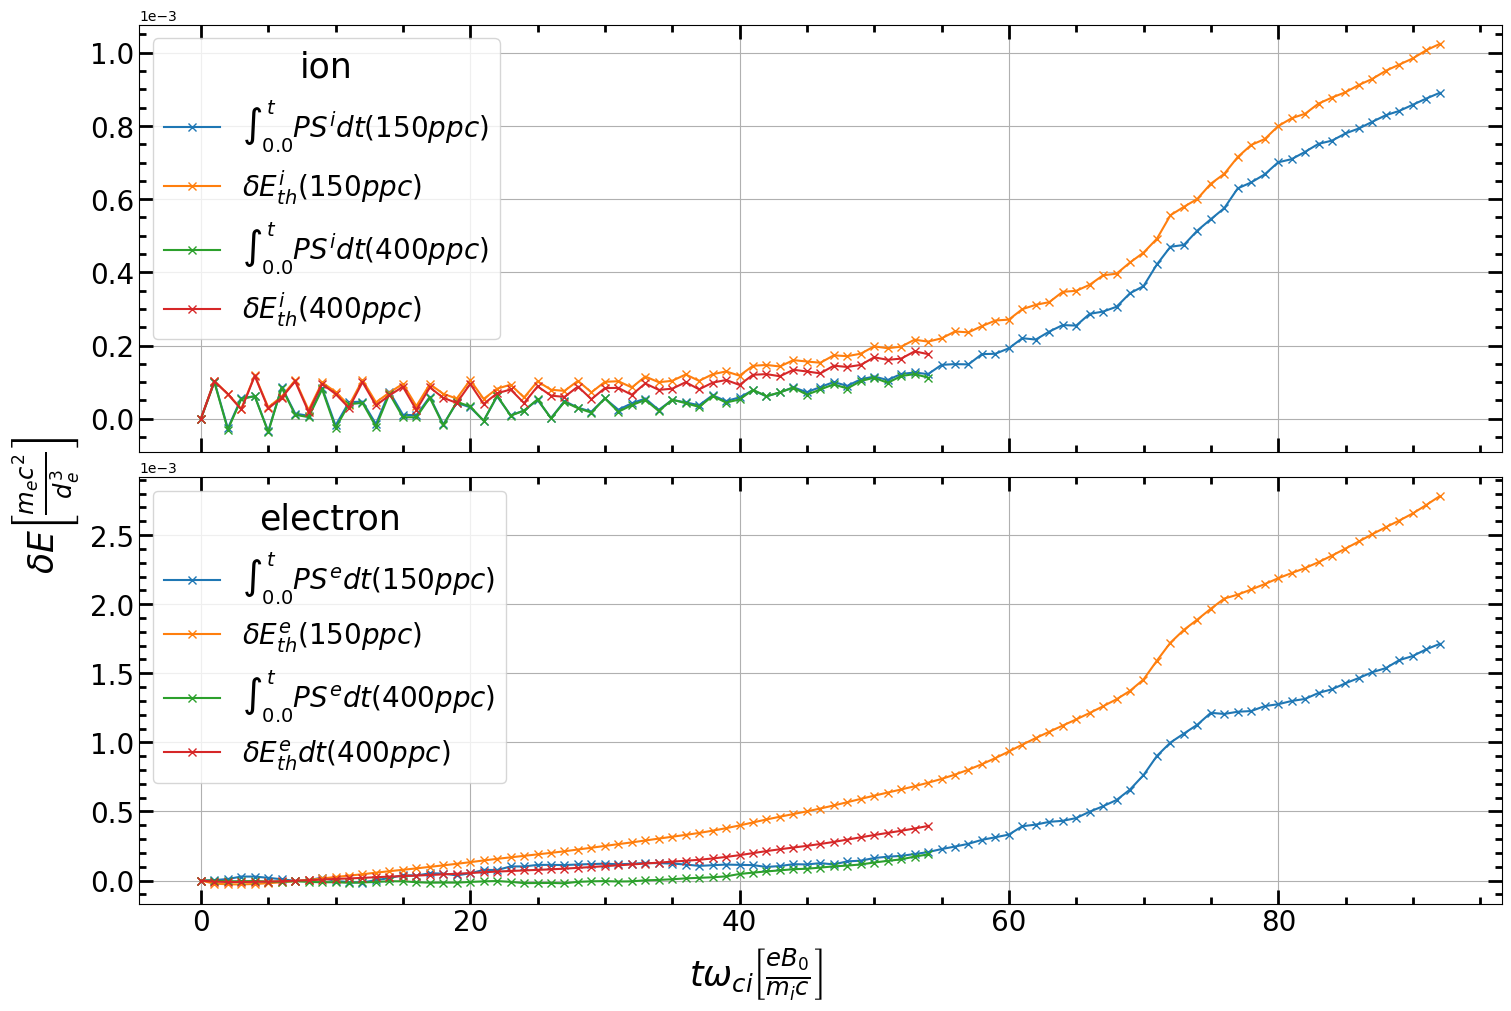

In [92]:
fig, axs = plt.subplots(2,1, figsize=(15, 10), sharex = True, layout='constrained')
sp = 'ion'
nppc = int(info['nppc'])
axs[0].plot(twci, dpsi, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]} dt({nppc} ppc)$')
axs[0].plot(twci, dEthi,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]} ({nppc} ppc)$')

nppc4 = int(info4['nppc'])
axs[0].plot(twci4, dpsi4, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]} dt({nppc4} ppc)$')
axs[0].plot(twci4, dEthi4,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]} ({nppc4} ppc)$')
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[0].legend(title = sp, title_fontsize = 25, loc = 'upper left', fontsize = 20)
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].yaxis.set_minor_locator(AutoMinorLocator())
axs[0].tick_params(which='both', width=2, labelsize = 20, right = True, direction = 'in')
axs[0].tick_params(which='major', length=10, top = True, right =True)
axs[0].tick_params(which='minor', length=5 , top = True, right =True)
axs[0].grid()

sp = 'electron'
nppc = int(info['nppc'])
axs[1].plot(twci, dpse, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]} dt({nppc} ppc)$')
axs[1].plot(twci, dEthe,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]}'f'({nppc} ppc)$')

nppc4 = int(info4['nppc'])
axs[1].plot(twci4, dpse4, marker = 'x', label = r'$\int_{'f'{time_twci}'r'}^t PS^'f'{sp[0]} dt({nppc4} ppc)$')
axs[1].plot(twci4, dEthe4,marker = 'x', label = r'$\delta E_{th}^'f'{sp[0]}'f'dt({nppc4} ppc)$')
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].ticklabel_format(axis = 'y',style = 'sci', scilimits = (0,0))
axs[1].legend(title = sp, title_fontsize = 25, loc = 'upper left', fontsize = 20)
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].yaxis.set_minor_locator(AutoMinorLocator())
axs[1].tick_params(which='both', width=2, labelsize = 20, right = True, direction = 'in')
axs[1].tick_params(which='major', length=10, top = True, right =True)
axs[1].tick_params(which='minor', length=5 , top = True, right =True)
axs[1].grid()

fig.supylabel(r'$\delta E \left[ \frac{m_e c^2}{d_e^3} \right] $', size = 25)
fig.supxlabel(r'$ t \omega_{ci} \left[ \frac{e B_0}{m_i c} \right]$', size = 25)

plt.savefig(figs + 'PS_dEth.jpg', dpi = 400)